# Setup

In [1]:
import numpy as np, timeit, time, matplotlib.pyplot as plt, json, os
from tqdm import tqdm

In [2]:
from experiments import *

In [3]:
import shutil, os
# shutil.make_archive("../results", 'zip', "../results")

# Main

## Evaluate experiments

In [10]:
## Base experiments
for exh, model, algo in exps:
    evaluate_SMK(model, exh, prefix="../")

100%|██████████| 15/15 [00:00<00:00, 440.76it/s]


In [11]:
## Noisy experiments
evaluate_noisy_SMK(prefix="../")

100%|██████████| 15/15 [00:00<00:00, 104.32it/s]


In [12]:
## Smallest experiments
evaluate_SMK(Models.BASE, Exhaustivness.SMALLEST, prefix="../")

100%|██████████| 90/90 [00:00<00:00, 705.92it/s]


In [13]:
## ILP experiments
evaluate_ILP(prefix="../")

In [14]:
## Noisy params
for algo in AlgoTypes:
    evaluate_params_SMK(algo, prefix="../")

100%|██████████| 20/20 [00:00<00:00, 350.07it/s]


## Plot results

### Main Figure

100%|██████████| 2/2 [00:05<00:00,  2.55s/it]


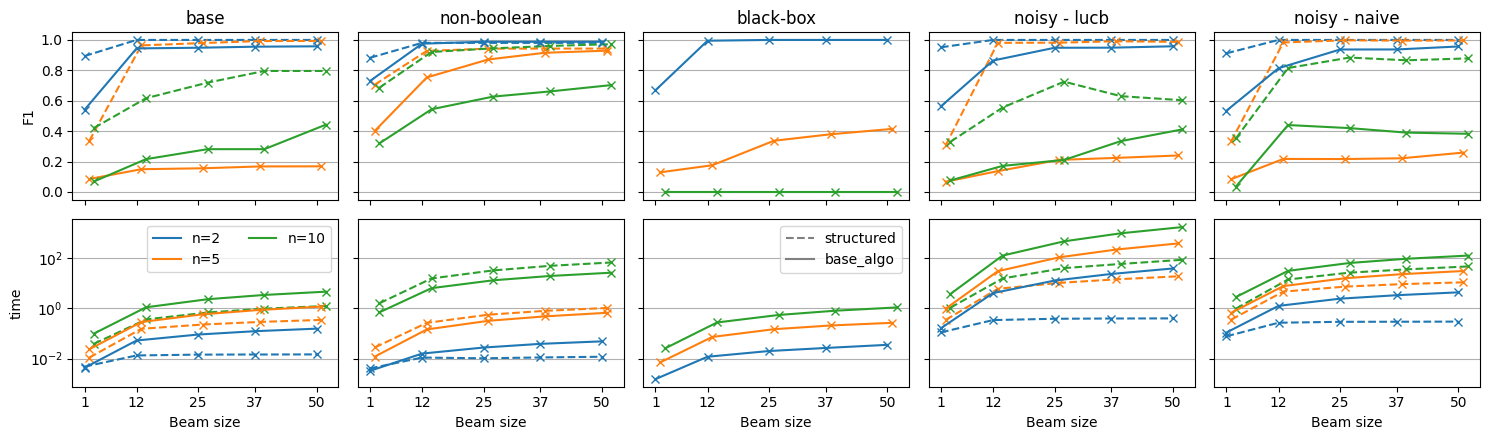

In [15]:
plot_two_metrics(n_attackers, beam_sizes, ("F1","time"), "main-fig", prefix="../")

### Main smallest figure

100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


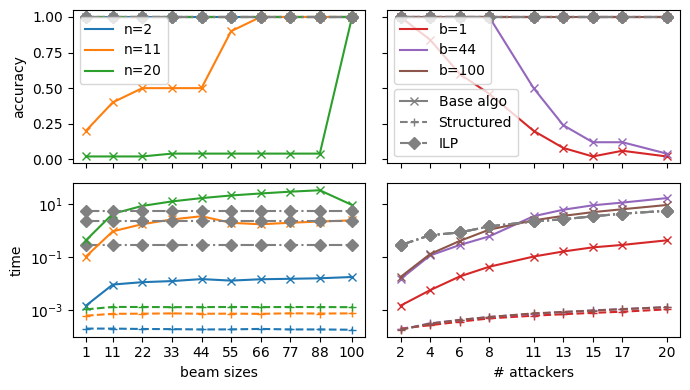

In [16]:
plot_smallest(n_attackers_smallest, beam_sizes_smallest)

### Noisy params

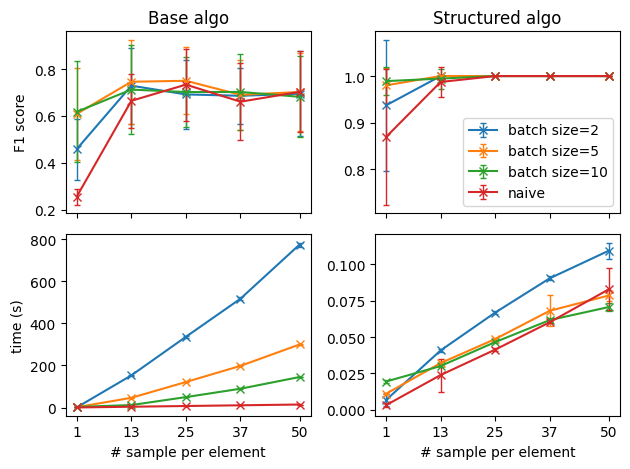

In [17]:
plot_noisy_params(Ns, prefix="../")

### Regressions

100%|██████████| 2/2 [00:01<00:00,  1.13it/s]


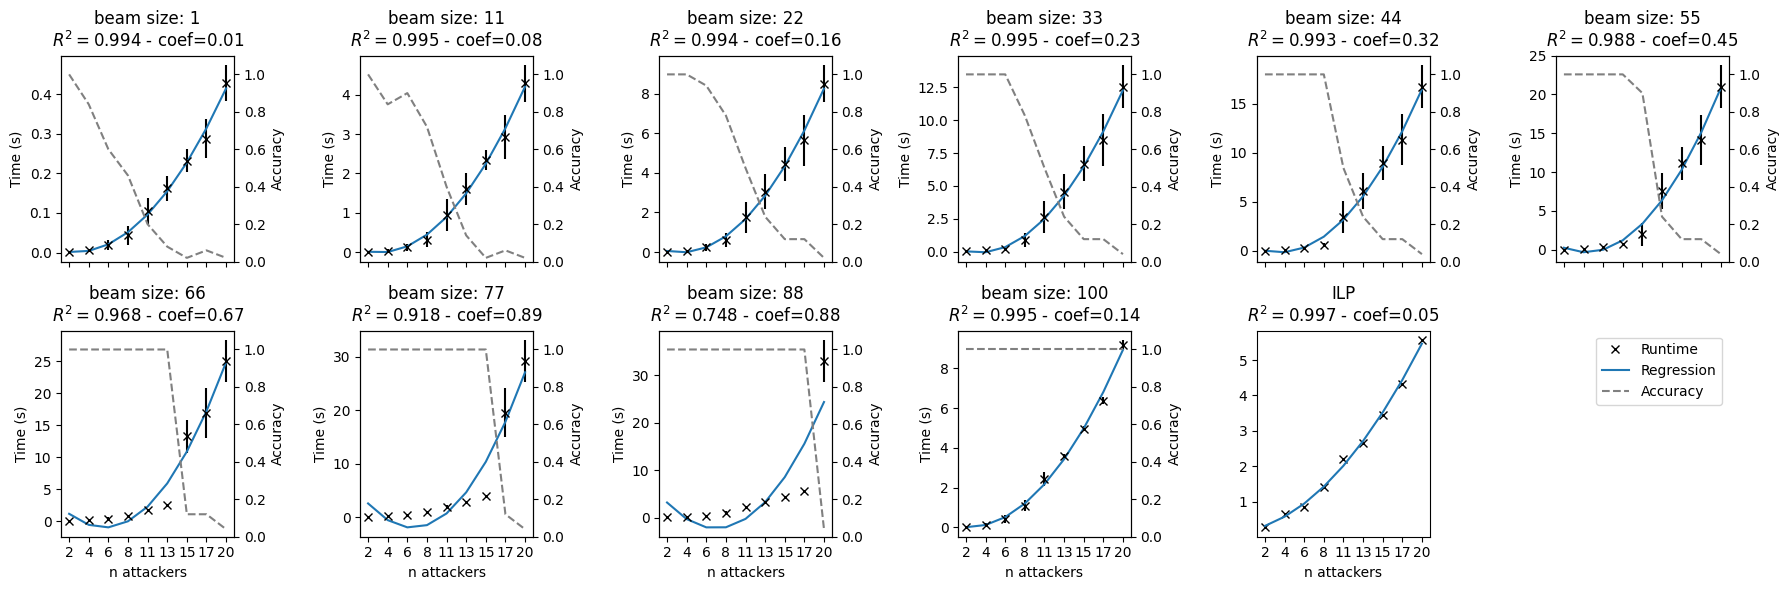

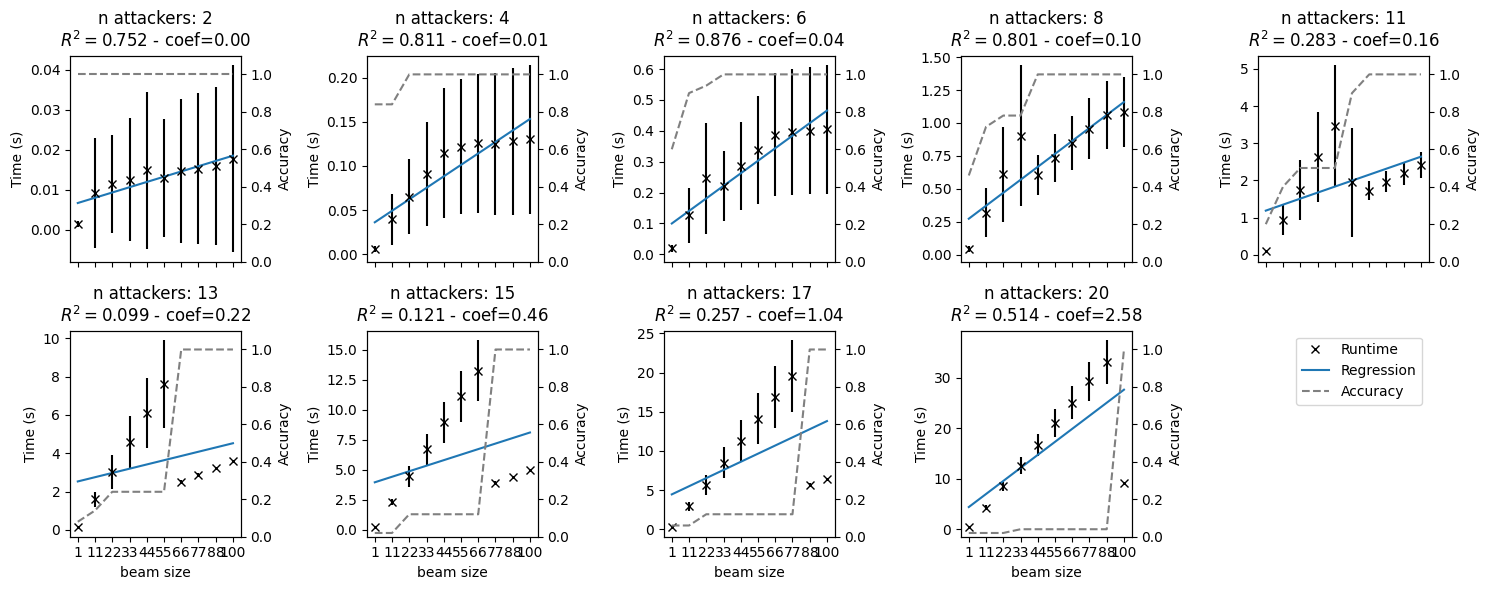

In [18]:
plot_regression_smallest(n_attackers_smallest, beam_sizes_smallest, ("time","accuracy"), prefix="../")

### Heuristics

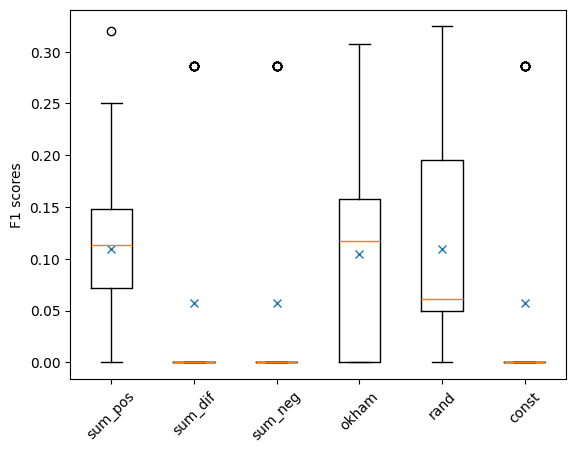

In [19]:
plot_heuristics("../")

### Box plots

Algo: structured / Metric: F1


100%|██████████| 4/4 [00:12<00:00,  3.19s/it]


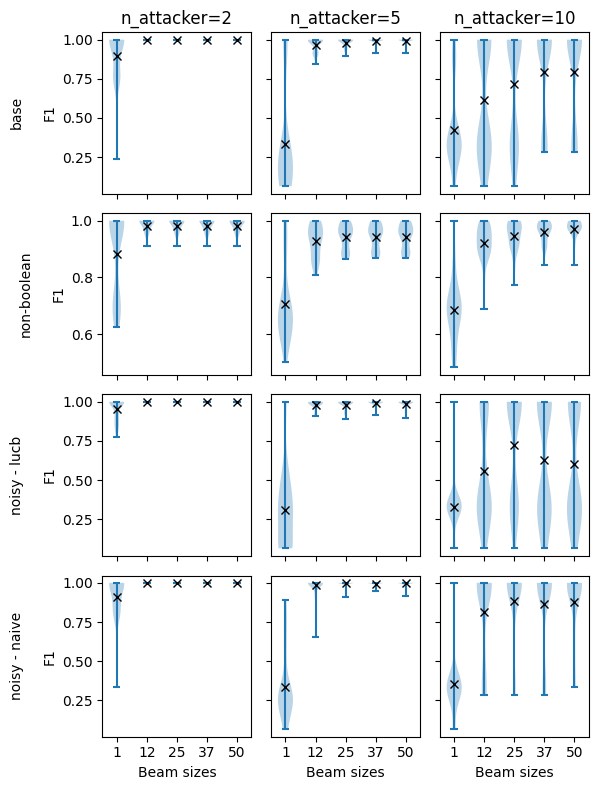




Algo: structured / Metric: time


100%|██████████| 4/4 [00:11<00:00,  2.91s/it]


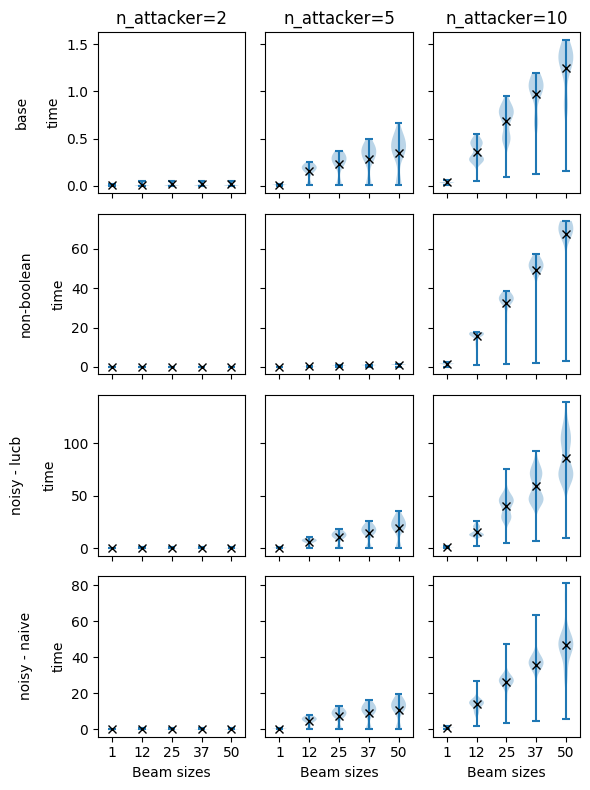




Algo: base_algo / Metric: F1


100%|██████████| 5/5 [00:08<00:00,  1.79s/it]


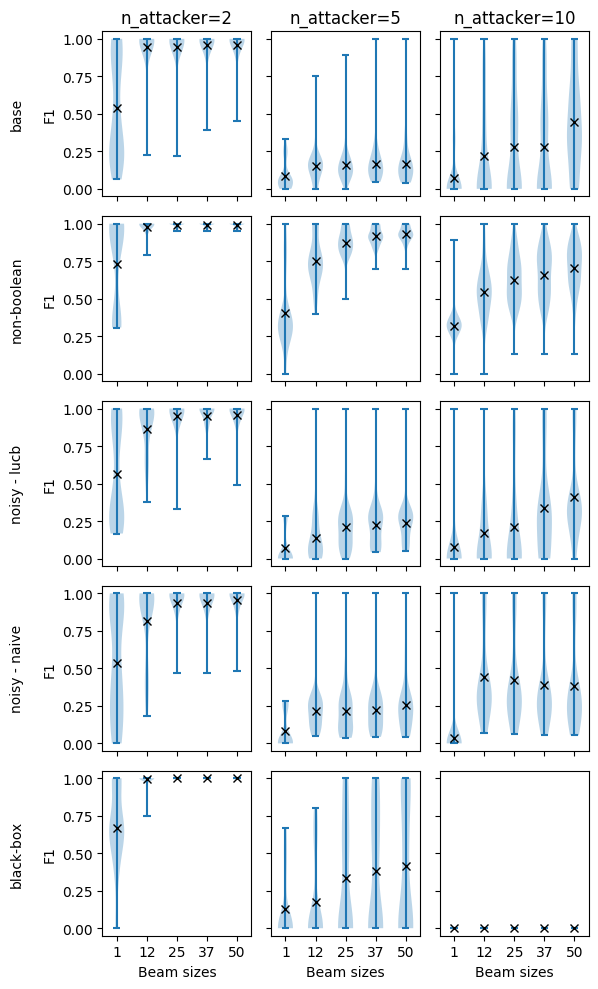




Algo: base_algo / Metric: time


100%|██████████| 5/5 [00:10<00:00,  2.02s/it]


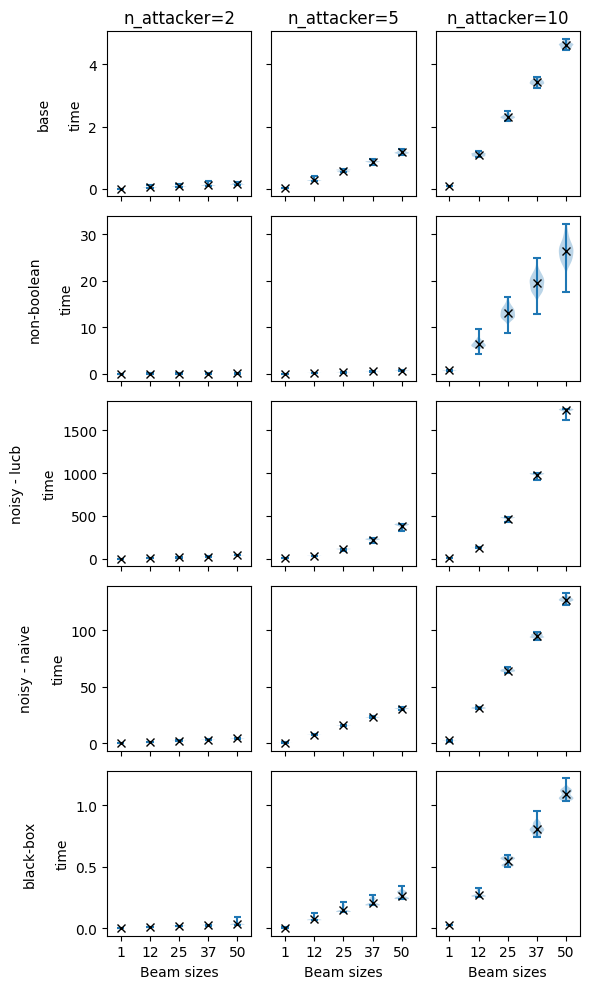

In [20]:
exh = Exhaustivness.FULL
for algo, metric in product(AlgoTypes, ("F1","time")):
    print(f"Algo: {algo.value} / Metric: {metric}")
    models = []
    for model in Models:
        if algo == AlgoTypes.STRUCTURED and model == Models.BLACK_BOX: continue
        if model == Models.NOISY:
            models.append((model, "lucb"))
            models.append((model, "naive"))
        else:
            models.append((model, None))
    plot_distributions(models, n_attackers, algo, exh, metric)
    print("\n\n")

### Recall / Precision plots

100%|██████████| 2/2 [00:05<00:00,  2.65s/it]


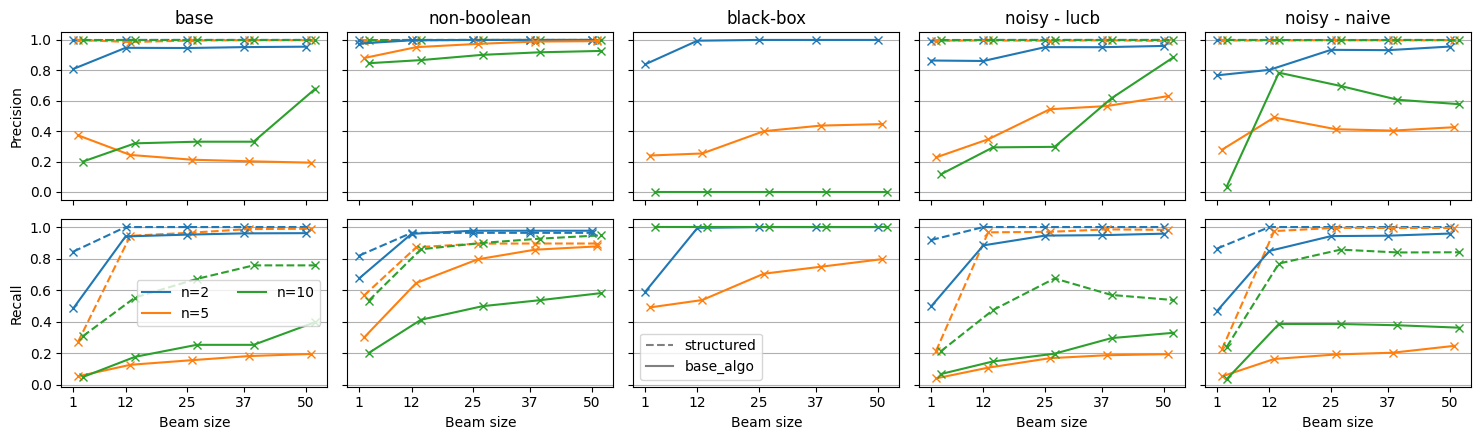

In [21]:
plot_two_metrics(n_attackers, beam_sizes, ("Precision", "Recall"), "f-components", prefix="../")

### Overshoot / miss plots

100%|██████████| 2/2 [00:05<00:00,  2.51s/it]


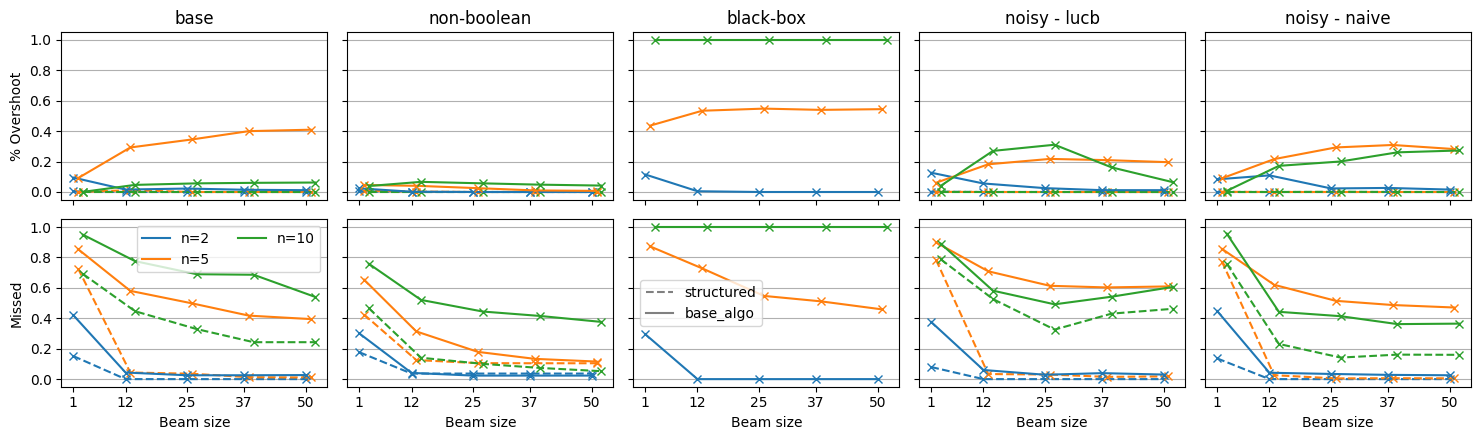

In [22]:
plot_two_metrics(n_attackers, beam_sizes, ("% Overshoot", "Missed"), "non-minimal",prefix="../")